# About
This notebook calculates the predicted fraction disordered for 32-rationally designed sequences generated with GOOSE (note that these sequences were developed prior to the development of metapredict V3).

For more information on these sequences, see: 

Emenecker, R. J., Guadalupe, K., Shamoon, N. M., Sukenik, S. & Holehouse, A. S. Sequence-ensemble-function relationships for disordered proteins in live cells. bioRxiv 2023.10.29.564547 (2023).
  


In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

In [27]:
import metapredict as meta
import protfasta 

metapredict_version = 3

In [28]:
D = protfasta.read_fasta('data/goose_paper.fasta')

In [29]:
ordered = []
disordered = []

ordered_names = []
disordered_names = []

ordered_seqs = {}
disordered_seqs = {}


for k in D:
        
    fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k],version=metapredict_version).disordered_domains])/len(D[k])        
    disordered.append(fraction_idr)
    disordered_names.append(k)
        
        

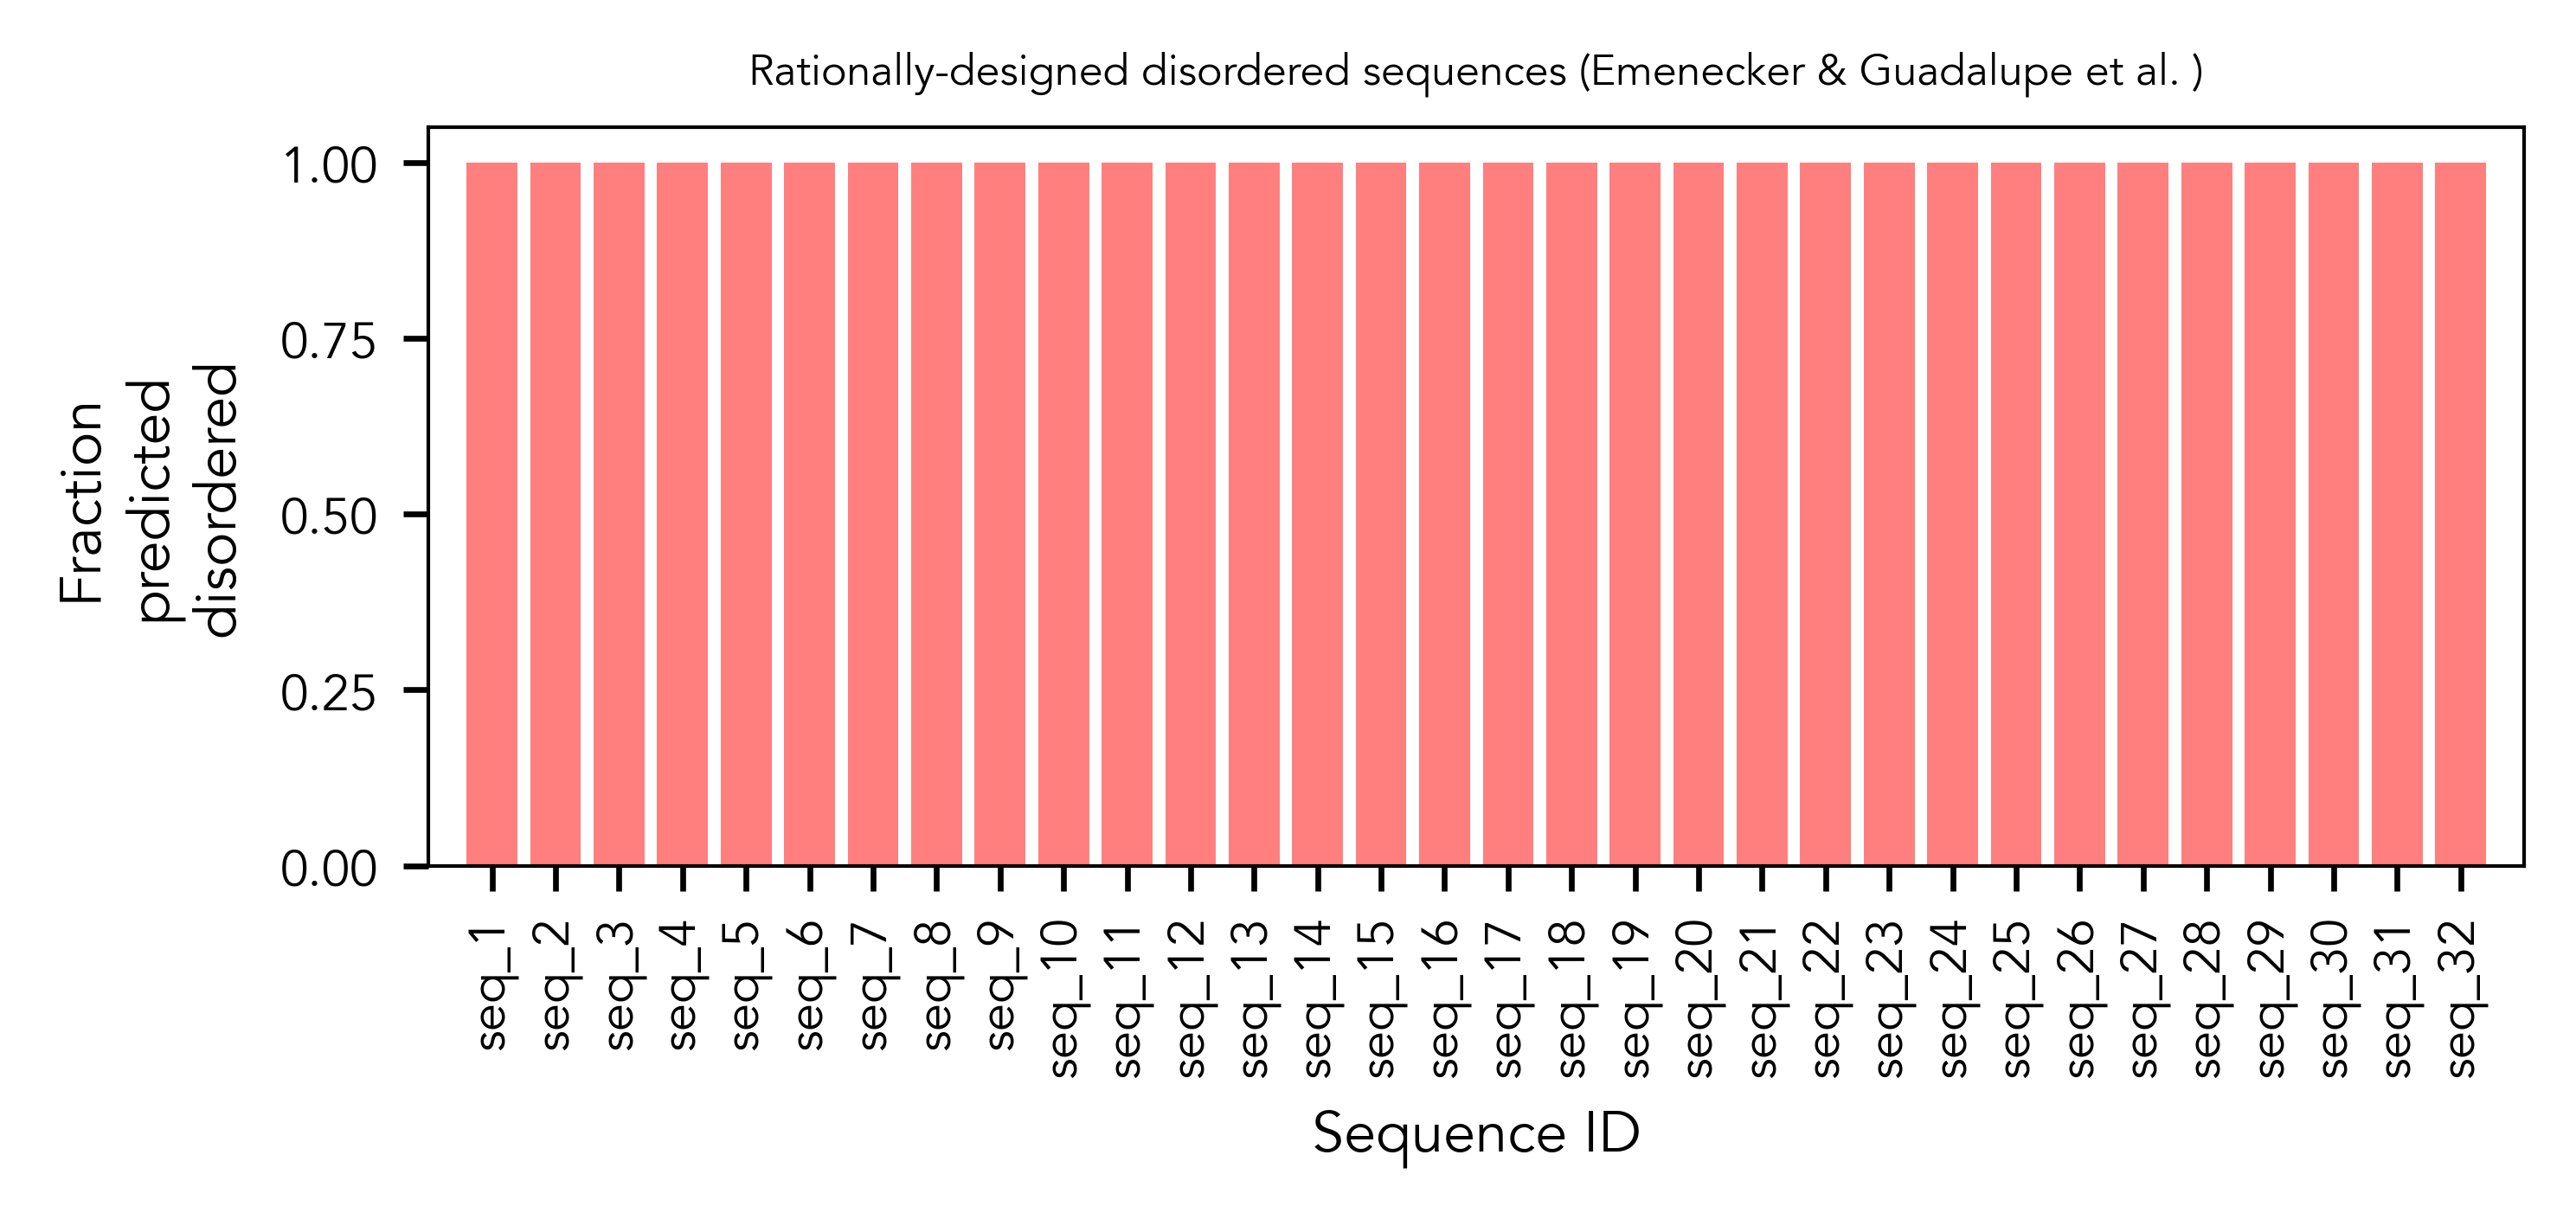

In [30]:

figure(num=None, figsize=(5, 2.3), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.bar(np.arange(1,len(disordered)+1), disordered, color='r', alpha=0.5)


plt.xlabel('Sequence ID',fontsize=8)
plt.ylabel('Fraction\npredicted\ndisordered', fontsize=8)
plt.xticks(np.arange(1,len(disordered)+1),disordered_names, rotation=90, fontsize=7) 
plt.yticks(fontsize=7)
plt.xlim([0,33])

plt.tight_layout()
plt.title('Rationally-designed disordered sequences (Emenecker & Guadalupe et al. )', fontsize=6)
plt.savefig(f'figures/goose_metapredict_version_{metapredict_version}.pdf')

